In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
h=pd.read_csv("D:\\Machine Learning\\PROJECT HEART\\heart.csv")

In [59]:
h.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
h.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [61]:
h.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Analysis of Data

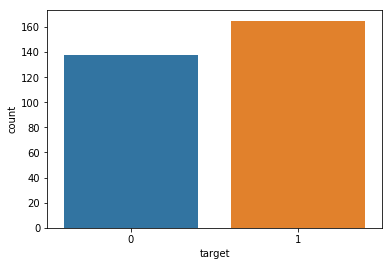

In [62]:
sns.countplot(x="target",data=h)

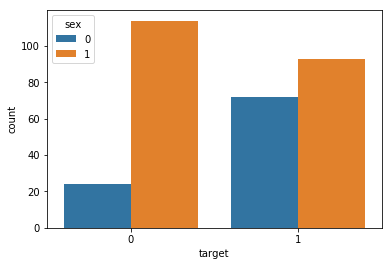

In [63]:
sns.countplot(x='target',hue='sex',data=h)

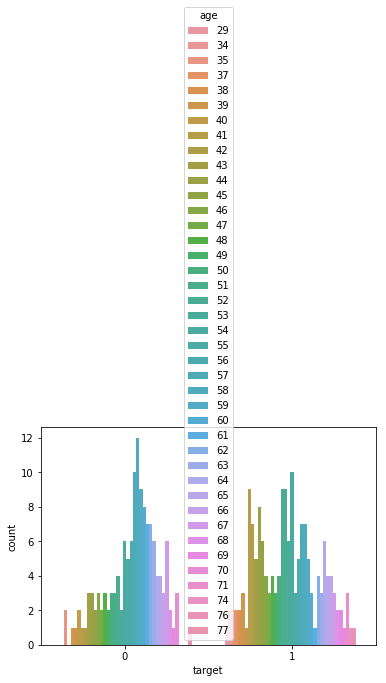

In [64]:
sns.countplot(x="target",hue="age",data=h)

In [65]:
# print the types of heart disease
t=h.loc[:,'target'].values
set(t)       #1 - Diseased  2 - Not Diseased

{0, 1}

In [66]:
#Diseased or Not Diseased count based on age
print("SEX: 0 - female 1 - male")
print("1 - Diseased  2 - Not Diseased")
print("Diseased or Not Diseased count based on age")
h.groupby(["sex","target"])["age"].count()

SEX: 0 - female 1 - male
1 - Diseased  2 - Not Diseased
Diseased or Not Diseased count based on age


sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: age, dtype: int64

In [67]:
#Count each chest pain value per heart disease type
print("Count each chest pain value per heart disease type")
h.groupby(["target", "cp"])["age"].count()

Count each chest pain value per heart disease type


target  cp
0       0     104
        1       9
        2      18
        3       7
1       0      39
        1      41
        2      69
        3      16
Name: age, dtype: int64

# DATA Preprocessing

In [68]:
#check for null values
h.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
x=h.iloc[:,0:-1].values
y=h.iloc[:,-1]

In [70]:
sc=StandardScaler()

In [71]:
x=sc.fit_transform(x)

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=43)

# Applying Logistic Regression

In [86]:
LR=LogisticRegression()

In [87]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
y_pred=LR.predict(x_test)

In [89]:
accuracy_score(y_pred,y_test)

0.9032258064516129

In [90]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86         9
          1       1.00      0.86      0.93        22

avg / total       0.93      0.90      0.91        31



In [91]:
h.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Applying RandomForestClassifier

In [92]:
RF=RandomForestClassifier(random_state=20,n_estimators=25,min_samples_split=.25)

In [93]:
 RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.25,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [94]:
y_pred=RF.predict(x_test)

In [95]:
accuracy_score(y_pred,y_test)

0.9354838709677419

In [96]:
confusion_matrix(y_pred,y_test)

array([[10,  0],
       [ 2, 19]], dtype=int64)

In [97]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91        10
          1       1.00      0.90      0.95        21

avg / total       0.95      0.94      0.94        31

